In [73]:
import glob
import os
import random
from skimage import exposure
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# import keras library
import keras

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
D_PATH = './trainingData'

In [74]:
# Assemble training and test data from @TrainingData files
data_file = sorted(glob.glob(f'{D_PATH}/*.npy'))
training_dicts=[]
for file in data_file:
    training_files= np.load(file,allow_pickle=True)
    training_dicts.append(training_files[()])
images = []
targets = []
for dict_ in training_dicts:
    for j in range(len(dict_['target'])):
        if dict_['data'][j].shape == (21, 21):
            images.append(dict_['data'][j])
            targets.append(dict_['target'][j])
if len(images) == len(targets):
    X = np.array(images)
    X= X[:,:,:,np.newaxis]
    y = np.array(targets)
    print (f"The Dataset contains {len(X)} images")
else:
    print ("Images and Targets dont match, check the training data!")



The Dataset contains 1124 images


In [75]:
def plot_digits(sample, images_per_row=10, **options):
    size = sample[0].shape[0] # get the size of x,y dimensions
    images_per_row = min(len(sample), images_per_row)
    images=[]
    for image in sample:
        percentiles = np.percentile(image, (1, 99))
        scaled=exposure.rescale_intensity(image, in_range=tuple(percentiles))
        images.append(scaled)
    n_rows = (len(sample) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(sample)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'gray', **options)
    plt.axis("off")
# TODO: change Function to add targets to each image

Saving figure MI_gallery


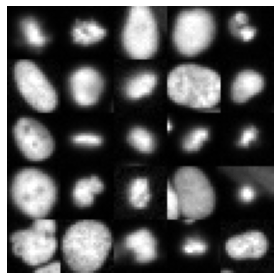

In [76]:
import pathlib
path = pathlib.Path.home() / 'Desktop'
def save_fig(fig_id, path=path, tight_layout=True, fig_extension="pdf", resolution=300):
    dest = path / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(dest, format=fig_extension, dpi=resolution)

sample=random.sample(list(X), 25)
plot_digits(sample, images_per_row=5)
save_fig('MI_gallery')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape


(899, 21, 21, 1)

In [78]:
# # initialize standard scaler
# ss = StandardScaler()
#
# def scale_features(train_features, test_features):
#     for image in train_features:
#         # for each channel, apply standard scaler's fit_transform method
#         for channel in range(image.shape[2]):
#             image[:, :, channel] = ss.fit_transform(image[:, :, channel])
#     for image in test_features:
#         # for each channel, apply standard scaler's transform method
#         for channel in range(image.shape[2]):
#             image[:, :, channel] = ss.transform(image[:, :, channel])
#
#
# # apply scale_features to four sets of features
# scale_features(X_train, X_test)


In [79]:
# define model as Sequential
model = Sequential()
# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[21,21,1]))
# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# add a thirs 2D convolutional layer with 128 filters
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))
# add additional dropout to prevent overfitting
model.add(Dropout(0.5))
# prediction layers
model.add(Dense(1, activation='sigmoid', name='preds'))
# show model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 19, 19, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                      

In [80]:
# Compile the model
model.compile(
    # set the loss as binary_crossentropy
    loss='binary_crossentropy',
    # set the optimizer as stochastic gradient descent
    optimizer='adam',
    # set the metric as accuracy
    metrics=['accuracy']
)

In [81]:
# mock-train the model using the first ten observations of the train and test sets
history=model.fit(
    X_train,
    y_train,
    epochs=20,
    verbose=1,
    validation_split=0.2)

Epoch 1/20


2022-11-09 16:13:58.805945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 29ms/step - loss: 109.1748 - accuracy: 0.7566 - val_loss: 8.3579 - val_accuracy: 0.8667
Epoch 2/20
 7/23 [========>.....................] - ETA: 0s - loss: 3.2156 - accuracy: 0.8705

2022-11-09 16:13:59.613210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 10ms/step - loss: 4.3961 - accuracy: 0.8331 - val_loss: 1.7764 - val_accuracy: 0.8278
Epoch 3/20
23/23 [==============================] - 0s 10ms/step - loss: 2.1829 - accuracy: 0.8387 - val_loss: 1.2089 - val_accuracy: 0.8556
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 1.0051 - accuracy: 0.8665 - val_loss: 0.4661 - val_accuracy: 0.8833
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.4284 - accuracy: 0.8665 - val_loss: 0.4265 - val_accuracy: 0.8333
Epoch 6/20
23/23 [==============================] - 0s 10ms/step - loss: 0.3210 - accuracy: 0.8707 - val_loss: 0.3211 - val_accuracy: 0.8667
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.3531 - accuracy: 0.8581 - val_loss: 0.4003 - val_accuracy: 0.8611
Epoch 8/20
23/23 [==============================] - 0s 10ms/step - loss: 0.3427 - accuracy: 0.8707 - val_loss: 0.4939 - val_accuracy: 0.8722
Epoch 9/20
23/23 [======

In [82]:
model.evaluate(X_test,y_test)


8/8 [==============================] - 0s 10ms/step - loss: 0.4283 - accuracy: 0.9022


[0.42831701040267944, 0.902222216129303]

In [83]:
y_proba=model.predict(X_test)

print("First five probabilities:")
print(y_proba[:10])
print("")

# predicted classes for x_eval
y_pred= np.round(y_proba).astype('int')

print("First five class predictions:")
print(y_pred[:10])
print("")

8/8 [==============================] - 0s 9ms/step
First five probabilities:
[[4.4572970e-01]
 [9.7536737e-01]
 [4.4690480e-04]
 [7.3776293e-01]
 [1.0000000e+00]
 [1.5196183e-02]
 [1.0000000e+00]
 [9.8461610e-01]
 [9.7276837e-02]
 [2.6511939e-03]]

First five class predictions:
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]



2022-11-09 16:14:06.106227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


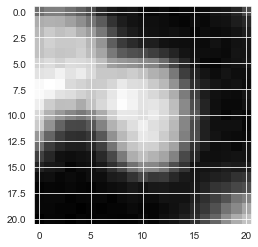

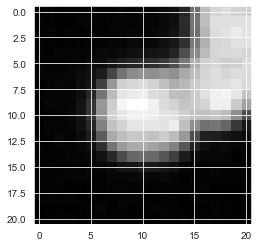

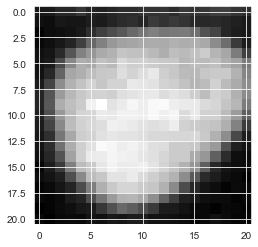

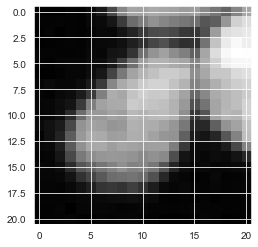

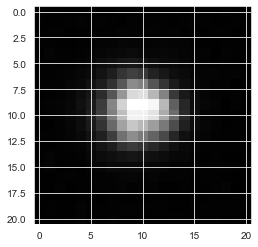

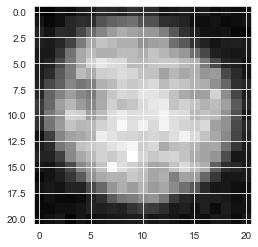

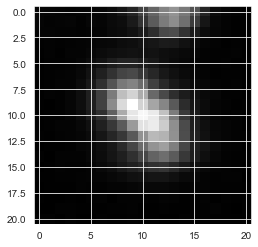

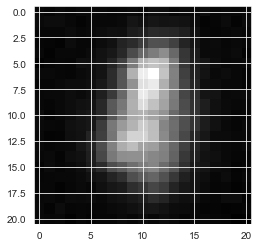

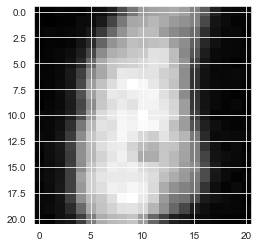

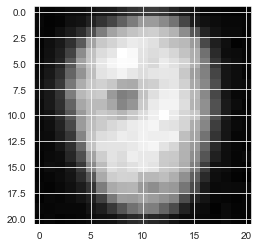

In [84]:
for i in range (10):
    plt.imshow(X_test[i], cmap='gray')
    plt.show(block=False)

In [85]:
len(X_test)


225

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saving figure training_data


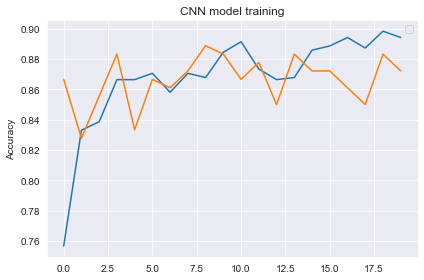

In [86]:
# Extract the history from the training object
training = history.history

# Plot the training loss
plt.plot(training['accuracy'])
# Plot the validation loss
plt.plot(training['val_accuracy'])
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN model training')
save_fig('training_data')
# Show the figure
plt.show()

In [87]:
model.save(os.path.join(D_PATH,'MI_CNN_model01.h5'))

In [88]:
model1=keras.models.load_model(os.path.join(D_PATH,'MI_CNN_model01.h5'))

In [89]:
model1.evaluate(X_test,y_test)

2022-11-09 16:14:16.009433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 11ms/step - loss: 0.4283 - accuracy: 0.9022


[0.42831701040267944, 0.902222216129303]

In [92]:
X_test[1].shape

(21, 21, 1)